In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv("data_wrangled.csv")

data = data[["location","price","bedrooms","bathrooms","garage","area"]]

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data['location_fix'] = labelencoder.fit_transform(data['location'])


X = data[["bedrooms", "bathrooms", "garage", "area"]]
y = data[["price"]]


data[["location","location_fix"]]


location        Zapopan
price             22300
bedrooms              3
bathrooms             4
garage                2
area                180
location_fix        138
Name: 0, dtype: object

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size= 0.8, test_size=0.2, 
                                                      random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
score_mse = mean_squared_error(y_valid,preds)
print('MAE:', score_mse)

#how to print predictions vs actual values

final_model = RandomForestRegressor(n_estimators=1000, random_state=0)
final_model.fit(X,y)

preds = final_model.predict(X)
score = mean_absolute_error(y,preds)
print(score)


print(mean_squared_error(y, preds,squared=False))

C:\Users\Rob\AppData\Local\Temp/ipykernel_7404/1388994617.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE: 183355403.04235467


C:\Users\Rob\AppData\Local\Temp/ipykernel_7404/1388994617.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X,y)


3053.205109558556
5511.827929628057


In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

reg.predict(X_valid)

predictions = reg.predict(X_valid)

lr_score = mean_absolute_error(y_valid, predictions)
print(lr_score)
print("MSE: ")
print(mean_squared_error(y_valid, predictions,squared=False))


final_reg = LinearRegression().fit(X, y)
final_reg_preds = final_reg.predict(X)
final_reg_score = mean_absolute_error(y,final_reg_preds)
print(final_reg_score)
print("MSE: ")
print(mean_squared_error(y, final_reg_preds,squared=False))

9311.325241944662
MSE: 
16477.24549947376
7606.503234631195
MSE: 
12877.584284045495


In [23]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.2)
model_xgb.fit(X_train,y_train)

xgb_predictions = model_xgb.predict(X_valid)

xgb_score = mean_absolute_error(y_valid, xgb_predictions)
xgb_score
print("MSE: ")
print(mean_squared_error(y_valid, xgb_predictions,squared=False))


MSE: 
13511.72231851773


In [24]:
final_xgb = xgb.XGBRegressor(n_estimators=10000, max_depth=4, learning_rate=0.2)
final_xgb.fit(X,y)
final_xgb_predictions = final_xgb.predict(X)

final_xgb_score = mean_absolute_error(y, final_xgb_predictions)

final_xgb_score

print("MSE: ")
print(mean_squared_error(y, final_xgb_predictions,squared=False))


MSE: 
2917.1317282739424


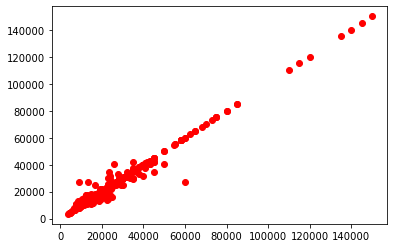

,bedrooms,bathrooms,garage,area
0,3,2,1,100


In [25]:
import matplotlib.pyplot as plt


plt.scatter(y, final_xgb_predictions, color='red')
plt.show()

test = pd.DataFrame([[3, 2, 1, 100]], columns = ["bedrooms","bathrooms","garage","area"])

final_xgb.predict(pd.DataFrame(test))

test

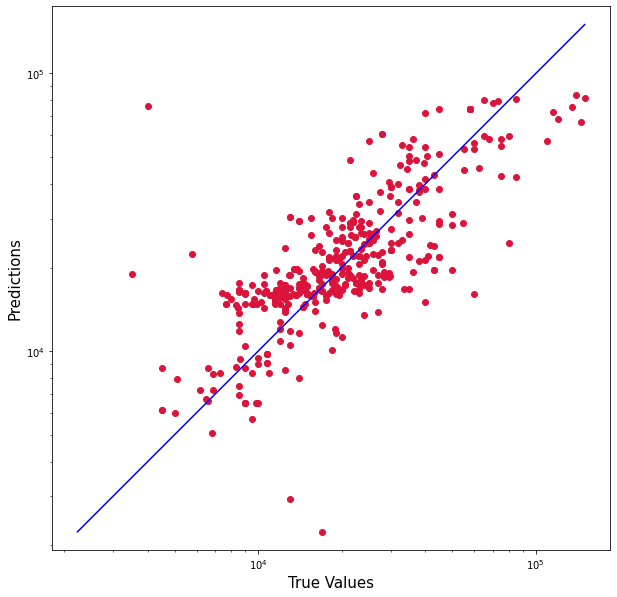

In [26]:
import numpy as np

y = np.array(y)

plt.figure(figsize=(10,10))
plt.scatter(y, final_reg_preds, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(final_reg_preds), max(y))
p2 = min(min(final_reg_preds), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

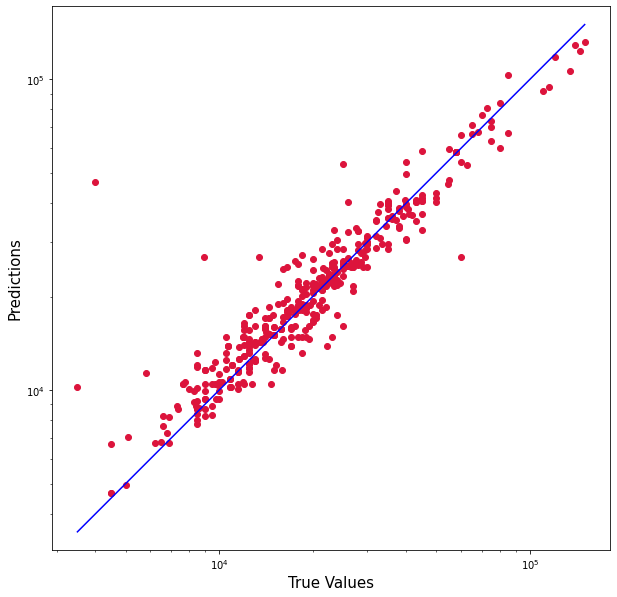

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y, preds, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(preds), max(y))
p2 = min(min(preds), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()